<a href="https://colab.research.google.com/github/Sowmyad15/Interview_Prep_Code/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df.target.value_counts()

,count
target,
0,50
1,50
2,50


In [25]:
df0=df[:50]
df1=df[51:100]
df2=df[101:150]

In [27]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1


In [29]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2


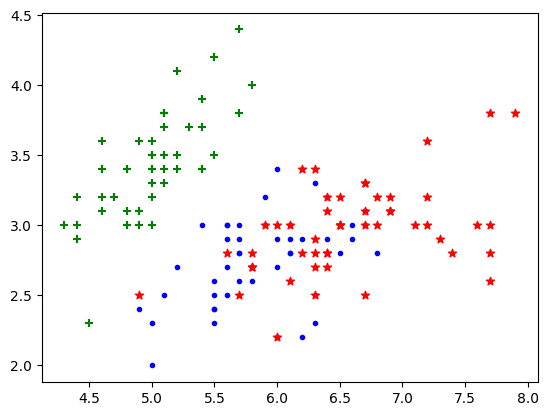

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*')
plt.show()


ML

In [31]:
from sklearn.model_selection import train_test_split

X= df.drop(['target'], axis='columns')
y=df.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [35]:
X_train.shape

(120, 4)

In [36]:
X_test.shape

(30, 4)

# **KNN**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=70)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=70)

In [53]:
neigh.score(X_test,y_test)

0.9666666666666667

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# **KNN From Strach**

In [66]:
import math

class KNN:
  def __init__(self,k):
    self.k=k

  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  def euclidean(self,x,y):
    dist=0
    for i in range(len(x)):
      dist += (x[i]-y[i])**2
    return math.sqrt(dist)

  def predict_one(self,X):
    distances=[]
    for i in range(len(self.X_train)):
      d= self.euclidean(X,self.X_train[i])
      distances.append([d,self.y_train[i]])
    print(f"DISTANCES:{distances}")

    sorted_dist = sorted(distances,key= lambda x:x[0])[:self.k]

    print(f"SORTED_DISTANCES:{sorted_dist}")

    get_labels=[]
    for i in range(len(sorted_dist)):
      get_labels.append(sorted_dist[i][1])

    print(f"LABELS:{get_labels}")

    max_count=-1
    label_dict={}
    for i in get_labels:
      if i not in label_dict:
        label_dict[i]=1
      else:
        label_dict[i]+=1

    print(f"LABEL DICT:{label_dict}")

    max_count=-1
    prediction= None
    for i in label_dict:
      if label_dict[i]>max_count:
        max_count=label_dict[i]
        prediction=i

    return prediction


  def predict(self,X_test):
    pred=[]
    for i in range(len(X_test)):
      pred.append(self.predict_one(X_test[i]))

    print(f"PREDICTION ON X_TEST:{pred}")
    return pred




In [67]:
knn = KNN(4)
X_train = [
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 5],
    [7, 7],
     [6, 5],
    [7, 7]
]

y_train = [0, 0, 1, 1, 1,0,1]

X_test=[[3,5],[9,0],[8,9]]
knn.fit(X_train,y_train)
knn.predict(X_test)

DISTANCES:[[3.605551275463989, 0], [2.23606797749979, 0], [2.0, 1], [3.0, 1], [4.47213595499958, 1], [3.0, 0], [4.47213595499958, 1]]
SORTED_DISTANCES:[[2.0, 1], [2.23606797749979, 0], [3.0, 1], [3.0, 0]]
LABELS:[1, 0, 1, 0]
LABEL DICT:{1: 2, 0: 2}
DISTANCES:[[8.246211251235321, 0], [7.615773105863909, 0], [6.708203932499369, 1], [5.830951894845301, 1], [7.280109889280518, 1], [5.830951894845301, 0], [7.280109889280518, 1]]
SORTED_DISTANCES:[[5.830951894845301, 1], [5.830951894845301, 0], [6.708203932499369, 1], [7.280109889280518, 1]]
LABELS:[1, 0, 1, 1]
LABEL DICT:{1: 3, 0: 1}
DISTANCES:[[9.899494936611665, 0], [8.48528137423857, 0], [7.810249675906654, 1], [4.47213595499958, 1], [2.23606797749979, 1], [4.47213595499958, 0], [2.23606797749979, 1]]
SORTED_DISTANCES:[[2.23606797749979, 1], [2.23606797749979, 1], [4.47213595499958, 1], [4.47213595499958, 0]]
LABELS:[1, 1, 1, 0]
LABEL DICT:{1: 3, 0: 1}
PREDICTION ON X_TEST:[1, 1, 1]


[1, 1, 1]